In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

%matplotlib inline

### Pre-porcessing data

In [2]:
df = pd.read_csv('Algerian_forest_fires.csv',header = 1,skiprows=[])
df = df.drop([122, 123, 124])
df["region"] = 0
df.loc[124:,['region']] = [1]
df.rename(columns = {'Classes  ':'Classes'}, inplace = True)
df['Classes'] = df['Classes'].str.strip()

In [3]:
one_hot = pd.get_dummies(df['Classes'])
# df = df.drop('Classes',axis = 1)
df = df.join(one_hot)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire,not fire
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0,0,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0,0,1


In [4]:
numericColums = [col for col in df.columns if col not in {'Classes','binaryClasses','day','month','year'}]
df[numericColums] = df[numericColums].apply(pd.to_numeric,errors='coerce')

### Exploring data

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire,not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       244 non-null    int64  
 15  fire         244 non-null    uint8  
 16  not fire     244 non-null    uint8  
dtypes: float64(7), int64(4), object(4), uint8(2)
memory usage: 39.1+ KB


In [7]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire,not fire
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000,0.561475,0.434426
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028,0.497226,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000,1.000000,0.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000,1.000000


In [8]:
df.shape

(244, 17)

### Exploratory Data Analysis

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region', 'fire', 'not fire']

We have 4 categorical features : ['day', 'month', 'year', 'Classes']


#### Feature information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not Fire

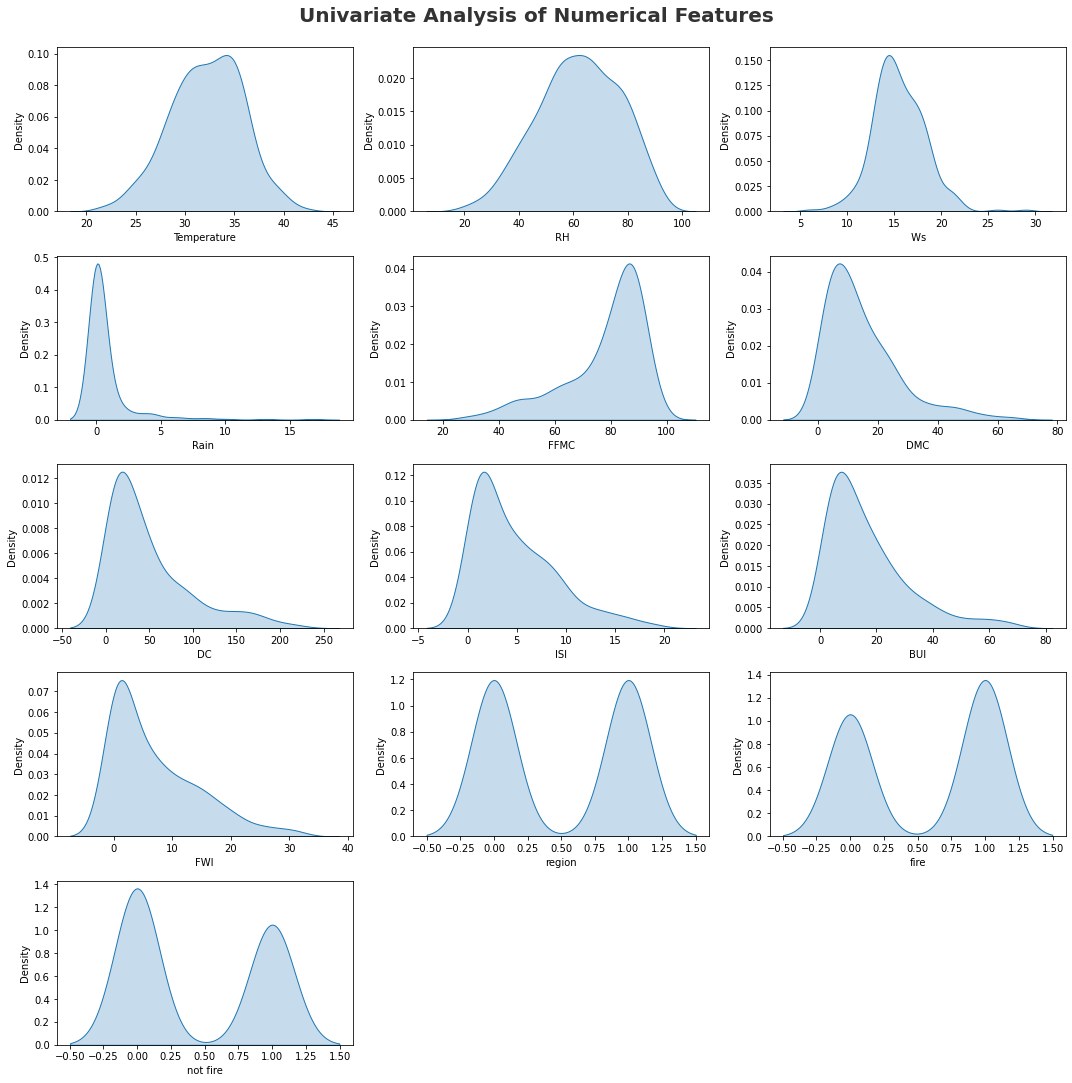

In [10]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True,palette="crest")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**
* Temperature, RH, Ws follow normal distrubution(not accuratly).
* Rain, DMC, Dc, ISI, BUI, FWI are right skewed.
* FFMC is left skewed

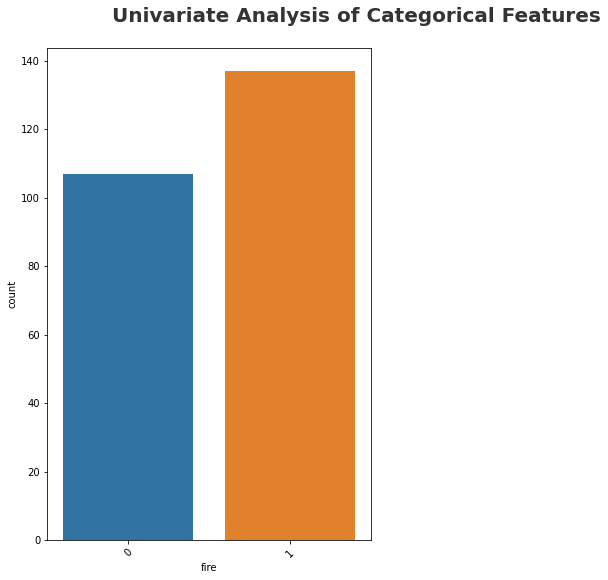

In [11]:
# categorical columns
plt.figure(figsize=(10, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'fire',]
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Box plot

Num of continues features : ['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


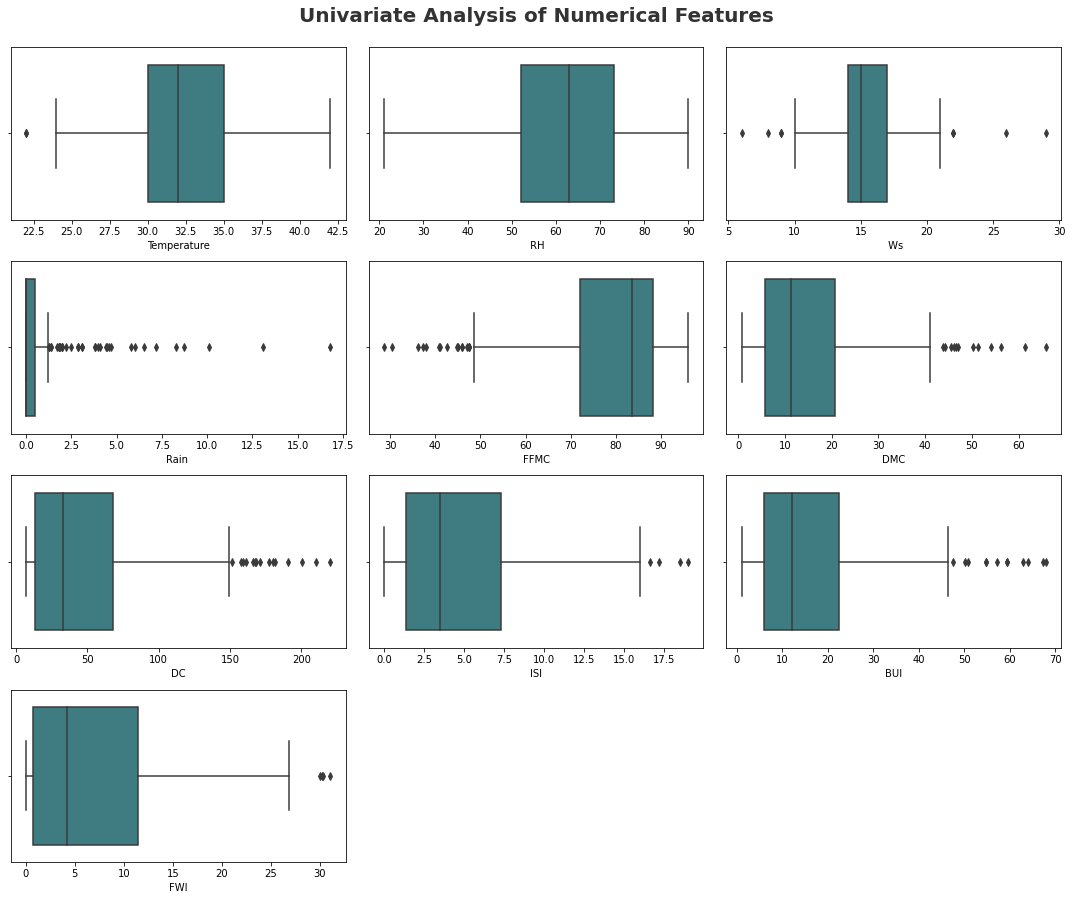

In [12]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(continues_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[continues_features[i]],palette="crest")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Observations
* We can see there are lot of outliers in rain
* There are equal amount of outliers in BUI, DMC, FFMC

### Multivariate Analysis

In [13]:
df[numeric_features].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire,not fire
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670,0.273496,0.506575,-0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957,-0.406424,-0.420695,0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368,-0.176829,-0.073810,0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422,-0.041080,-0.376727,0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132,0.224680,0.762942,-0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864,0.191094,0.584757,-0.584188
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521,-0.081482,0.512609,-0.507132
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.922895,0.268421,0.719419,-0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857973,0.087370,0.586915,-0.583882
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,0.719216,-0.719216


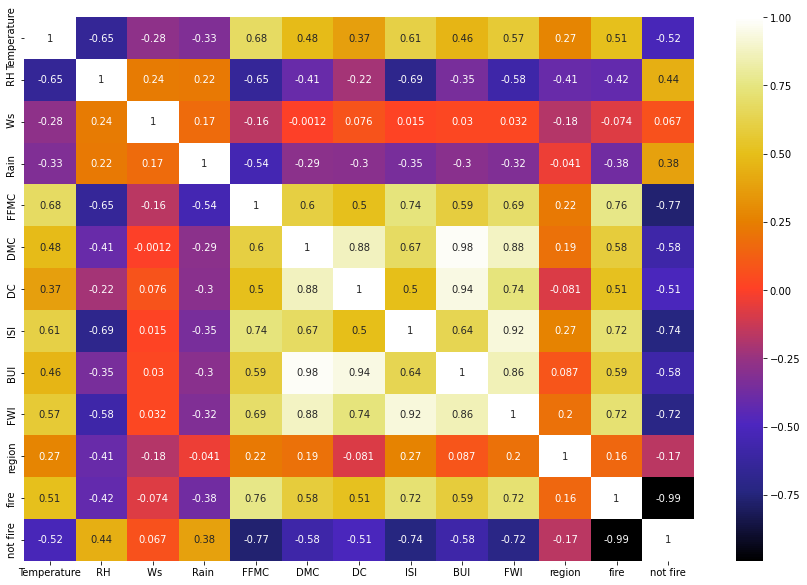

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Observations:
* Temperature, FFMC, DMC, ISI, BUI, FWI have postive corillation towards fire
* RH, ws, rain have negative corillation towards fire

* ##### The more the Temperature, FFMC, DMC, ISI, BUI, FWI value is the more the chance of forest fire
* ##### The more the RH, ws, rain value is the less the chance of forest fire

<Figure size 720x720 with 0 Axes>

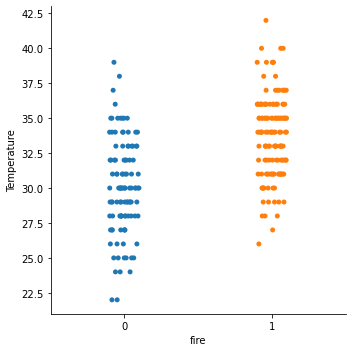

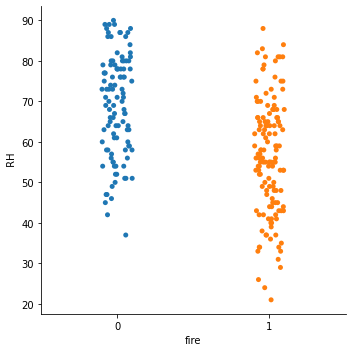

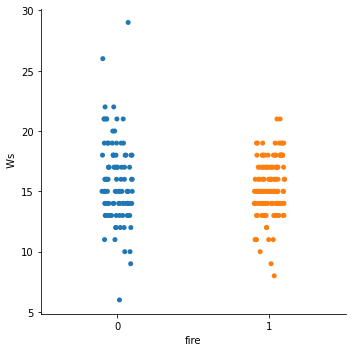

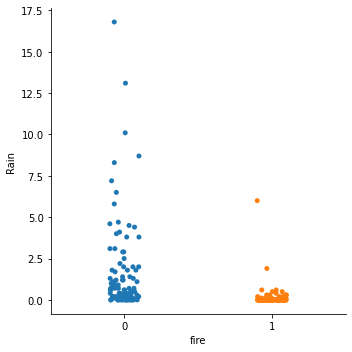

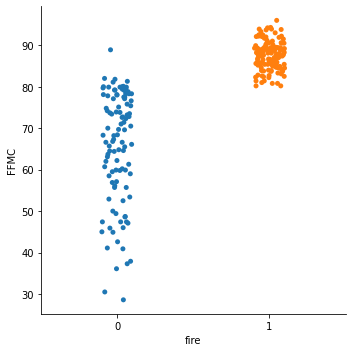

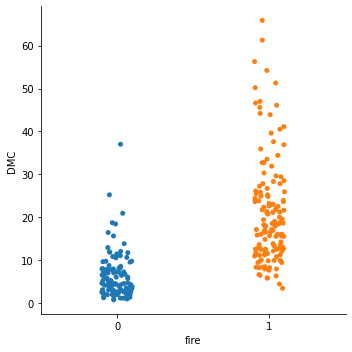

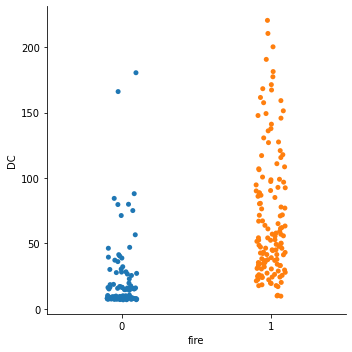

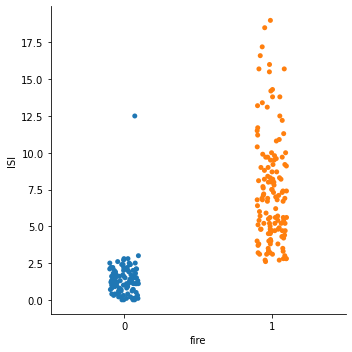

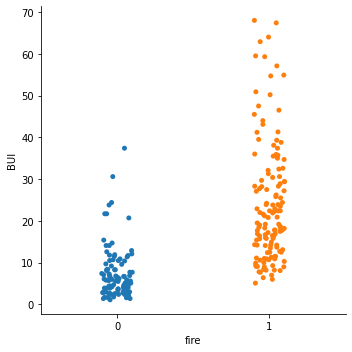

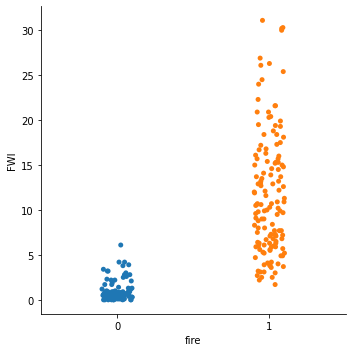

In [15]:
plt.figure(figsize=(10, 10))
plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(continues_features)):
    sns.catplot(data=df,y=continues_features[i], x="fire")
    plt.xlabel("fire")
    plt.tight_layout()

### Observations:

#### During the below conditions there is high chance of forest fire:
* When FFMC value is more than 80
* When ISI value is more than 3
* When FWI value in more than 3.5

<AxesSubplot:xlabel='month'>

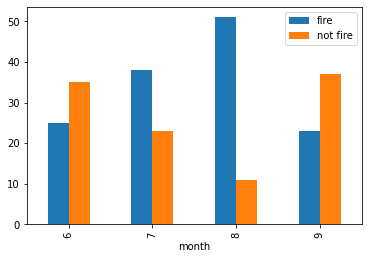

In [24]:
groupByMonth = df.groupby(['month']).sum()
groupByMonth[['fire','not fire']].plot(kind = 'bar')

### Obeservations:
* As we can see August month has more chance of occurrance of forest fire

September has the most occurance of rain with 38.42% of total rain


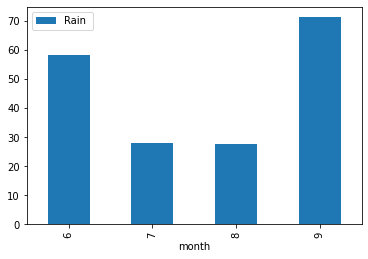

In [46]:
groupByMonth[['Rain ']].plot(kind='bar')
totalRain = df['Rain '].sum()
RainOnSept = groupByMonth.iloc[3][3]
percentageOfRainOnSept = (RainOnSept/totalRain) * 100
print(f'September has the most occurance of rain with {round(percentageOfRainOnSept,2)}% of total rain')

<AxesSubplot:xlabel='count', ylabel='Temperature'>

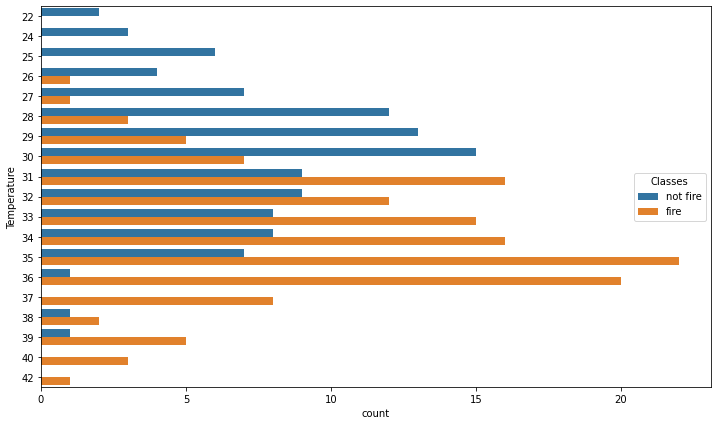

In [17]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y="Temperature", hue="Classes")

### Obeservations:
* As we can when the temperature is more the 35 there is high chance of forest fire

<AxesSubplot:xlabel='region'>

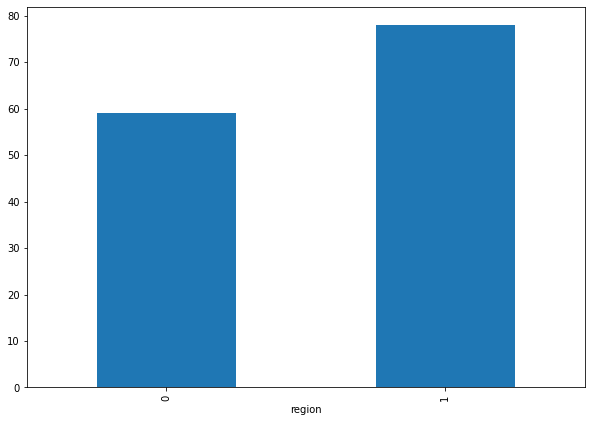

In [18]:
plt.figure(figsize=(10, 7))
groupByRegion = df.groupby(['region']).sum()
groupByRegion['fire'].plot(kind = 'bar')

### Obeservations:
* Region 1 - Sidi-Bel Abbes Region has the highest forest fire count

In [19]:
groupByTemp = df.groupby(['Temperature']).mean()

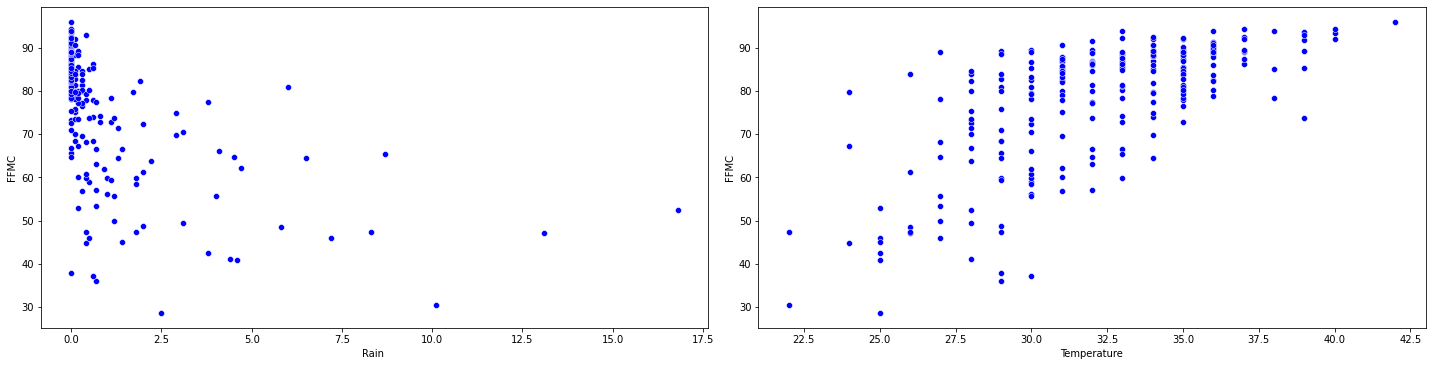

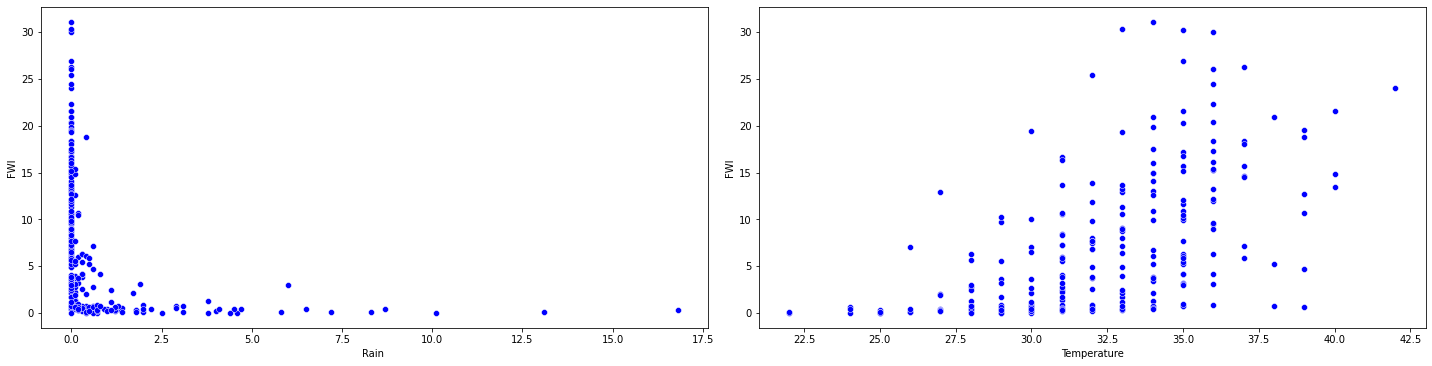

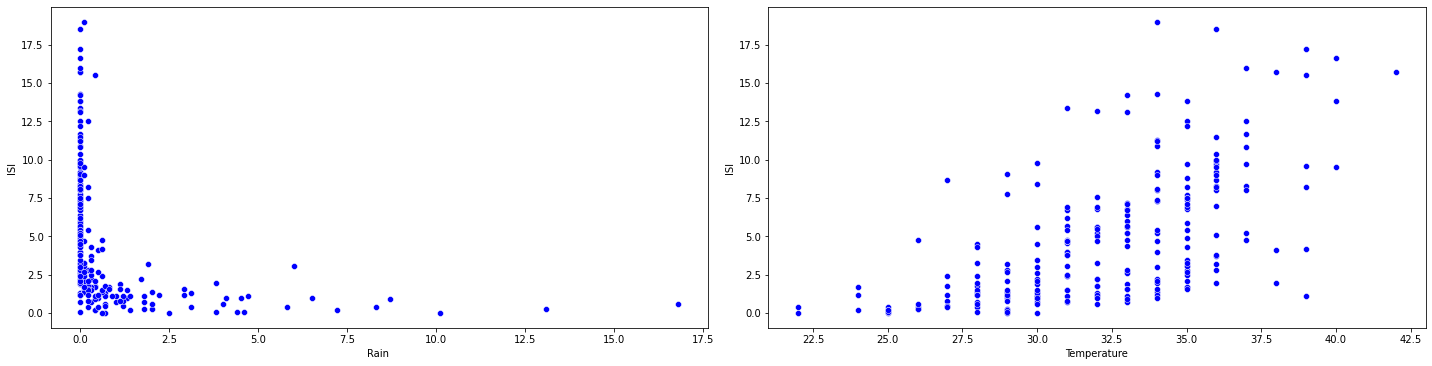

In [20]:
fig = plt.figure(figsize=(20, 40))
rainAndTemp =['Rain ','Temperature']
for i in range(0, len(rainAndTemp)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data= df ,x=rainAndTemp[i], y='FFMC', color='b')
    plt.tight_layout()
    
fig = plt.figure(figsize=(20, 40))
rainAndTemp =['Rain ','Temperature']
for i in range(0, len(rainAndTemp)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data= df ,x=rainAndTemp[i], y='FWI', color='b')
    plt.tight_layout()
    
fig = plt.figure(figsize=(20, 40))
rainAndTemp =['Rain ','Temperature']
for i in range(0, len(rainAndTemp)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data= df ,x=rainAndTemp[i], y='ISI', color='b')
    plt.tight_layout()

### Obeservations:
#### Since FFMC has a strong corillation with the occurance of forest fire, we found the some other factors also affect FFMC, FWI, ISI which will cause the forest fire. 
* As the tempature increase the FFMC,FWI,ISI value increases which will increase the chance of forest fire
* When there is more rain the FFMC,FWI,ISI value reduces which will reduce the chance of forest fire

#### Thus rain and tempertaure indrectly affects the cause of forest fire

################################################################################################################
### FINAL OBSERVATIONS:
* FFMC, FWI, ISI are the important factors that affect the occurance of forest fire
* Temperature and rain indrectly affects the forest fire by corrilating with FFMC, FWI, ISI
* Most of the forest fire occur during August
* Highest amount of rain is measure during september
* When FFMC value is more than 80
* When ISI value is more than 3
* When FWI value in more than 3.5
* when the temperature is more the 35 there is high chance of forest fire

################################################################################################################